In [81]:
from google.colab import files
uploaded = files.upload()

Saving dados_tratados (1).csv to dados_tratados (1).csv


In [82]:
import pandas as pd

df = pd.read_csv('dados_tratados (1).csv')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [83]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})





In [84]:
# Primeiro, identifique as colunas categóricas (tipo object)
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Como já transformamos 'Churn', remova ela da lista (se estiver nela)
if 'Churn' in cat_cols:
    cat_cols.remove('Churn')

# Aplicar one-hot encoding nessas colunas categóricas
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Exibir as primeiras linhas para conferir
print(df_encoded.head())


   Churn  customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
0    0.0                       0                9                     65.6   
1    0.0                       0                9                     59.9   
2    1.0                       0                4                     73.9   
3    1.0                       1               13                     98.0   
4    1.0                       1                3                     83.9   

   customerID_0003-MKNFE  customerID_0004-TLHLJ  customerID_0011-IGKFF  \
0                  False                  False                  False   
1                   True                  False                  False   
2                  False                   True                  False   
3                  False                  False                   True   
4                  False                  False                  False   

   customerID_0013-EXCHZ  customerID_0013-MHZWF  customerID_0013-SMEOE  ...  \
0      

In [85]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')


In [86]:
# Atualizar lista de colunas categóricas, excluindo a coluna numérica convertida
cat_cols = df.select_dtypes(include='object').columns.tolist()
if 'Churn' in cat_cols:
    cat_cols.remove('Churn')

# Aplicar o get_dummies só nessas colunas categóricas
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print(df_encoded.head())
print(df_encoded.columns.tolist())




   Churn  customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
0    0.0                       0                9                     65.6   
1    0.0                       0                9                     59.9   
2    1.0                       0                4                     73.9   
3    1.0                       1               13                     98.0   
4    1.0                       1                3                     83.9   

   account.Charges.Total  customerID_0003-MKNFE  customerID_0004-TLHLJ  \
0                 593.30                  False                  False   
1                 542.40                   True                  False   
2                 280.85                  False                   True   
3                1237.85                  False                  False   
4                 267.40                  False                  False   

   customerID_0011-IGKFF  customerID_0013-EXCHZ  customerID_0013-MHZWF  ...  \
0      

In [87]:
# Contagem de clientes por classe
contagem = df['Churn'].value_counts()

print("Contagem de clientes por classe:")
print(contagem)

# Proporção percentual de clientes que evadiram e que permaneceram
proporcao = df['Churn'].value_counts(normalize=True) * 100

print("\nProporção percentual de clientes por classe:")
print(proporcao)

# Avaliação do desequilíbrio
if proporcao.min() < 30:
    print("\nAtenção: há desbalanceamento considerável entre as classes.")
else:
    print("\nAs classes parecem relativamente balanceadas.")


Contagem de clientes por classe:
Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

Proporção percentual de clientes por classe:
Churn
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64

Atenção: há desbalanceamento considerável entre as classes.


Correlação das variáveis com Churn:
Churn                      1.000000
account.Charges.Monthly    0.193356
customer.SeniorCitizen     0.150889
account.Charges.Total     -0.199484
customer.tenure           -0.352229
Name: Churn, dtype: float64


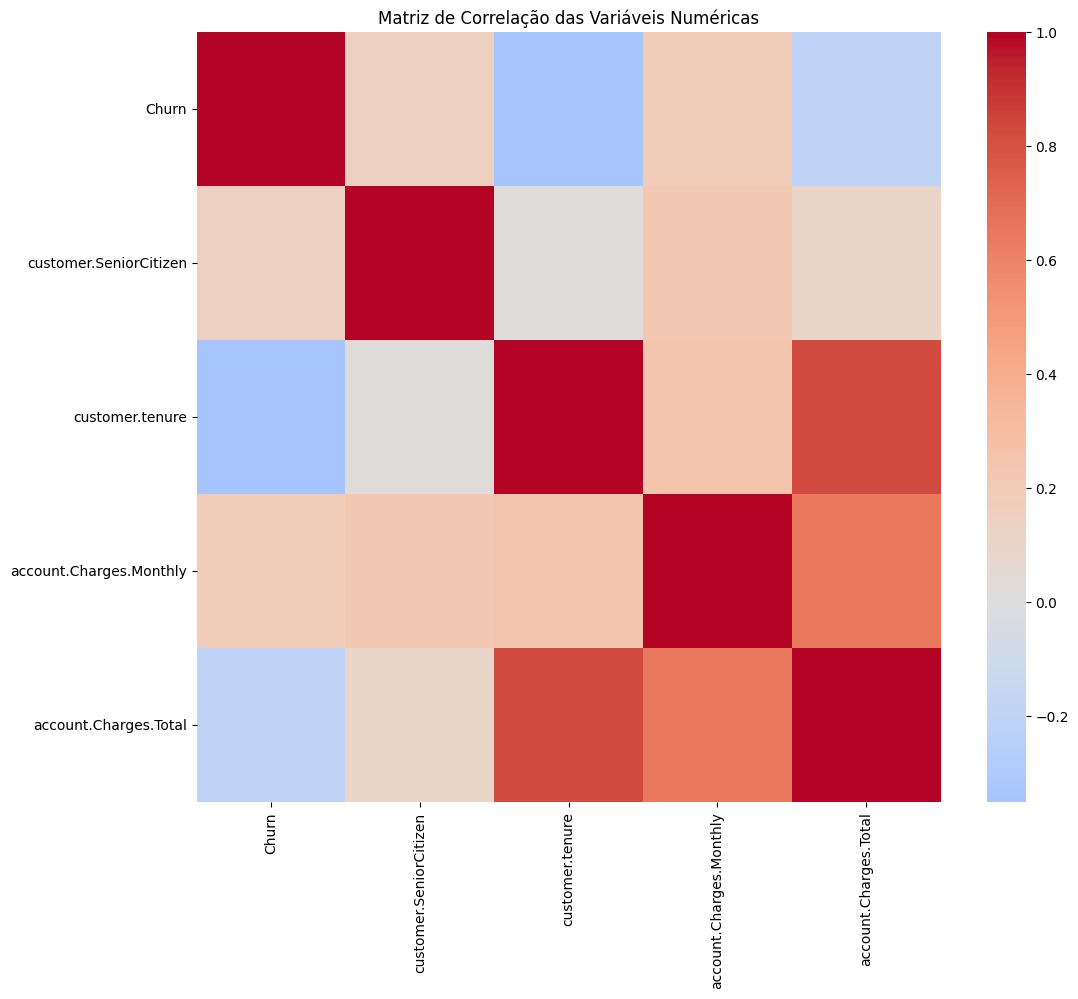

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'df_encoded' já tem o Churn numérico e as demais colunas codificadas
# Seleciona colunas numéricas para a correlação
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Calcula a matriz de correlação
corr_matrix = df_encoded[numeric_cols].corr()

# Visualiza a correlação com a variável alvo 'Churn'
print("Correlação das variáveis com Churn:")
print(corr_matrix['Churn'].sort_values(ascending=False))

# Opcional: plotar um heatmap da correlação completa
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Matriz de Correlação das Variáveis Numéricas")
plt.show()


Churn
0.0    5174
1.0    1869
NaN     224
Name: count, dtype: int64
0
11


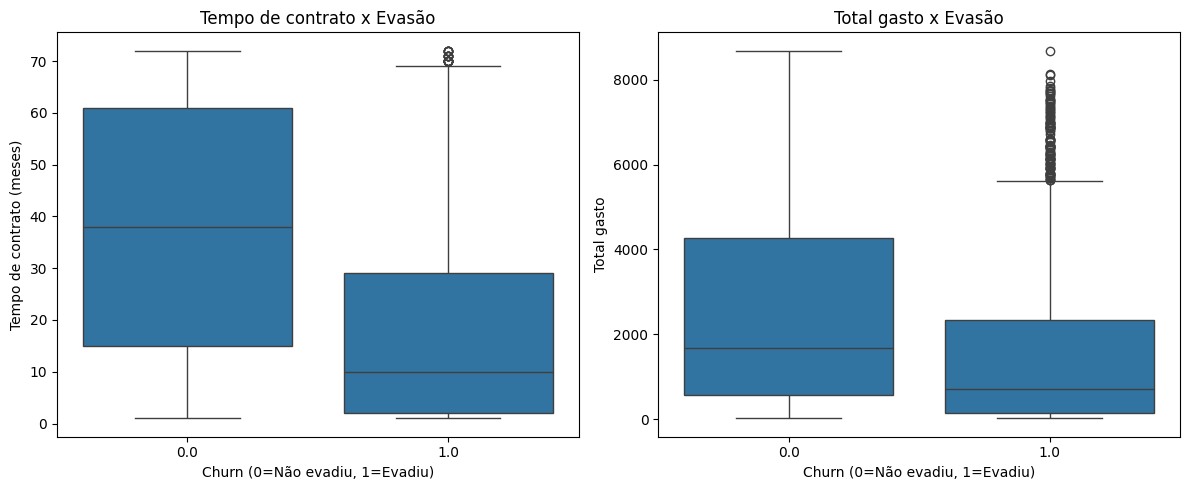

In [89]:
# 1. Verificar valores únicos em 'Churn' e se há NaNs
print(df['Churn'].value_counts(dropna=False))

# 2. Verificar se há NaNs em tenure e Charges.Total
print(df['customer.tenure'].isna().sum())
print(df['account.Charges.Total'].isna().sum())

# 3. Filtrar somente linhas sem NaN em Churn, tenure e Charges.Total
df_clean = df.dropna(subset=['Churn', 'customer.tenure', 'account.Charges.Total'])

# 4. Garantir que 'Churn' é numérico (0 e 1)
if df_clean['Churn'].dtype != 'int64' and df_clean['Churn'].dtype != 'float64':
    df_clean['Churn'] = df_clean['Churn'].map({'No': 0, 'Yes': 1})

# Agora sim, tentar o plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='customer.tenure', data=df_clean)
plt.title('Tempo de contrato x Evasão')
plt.xlabel('Churn (0=Não evadiu, 1=Evadiu)')
plt.ylabel('Tempo de contrato (meses)')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='account.Charges.Total', data=df_clean)
plt.title('Total gasto x Evasão')
plt.xlabel('Churn (0=Não evadiu, 1=Evadiu)')
plt.ylabel('Total gasto')

plt.tight_layout()
plt.show()



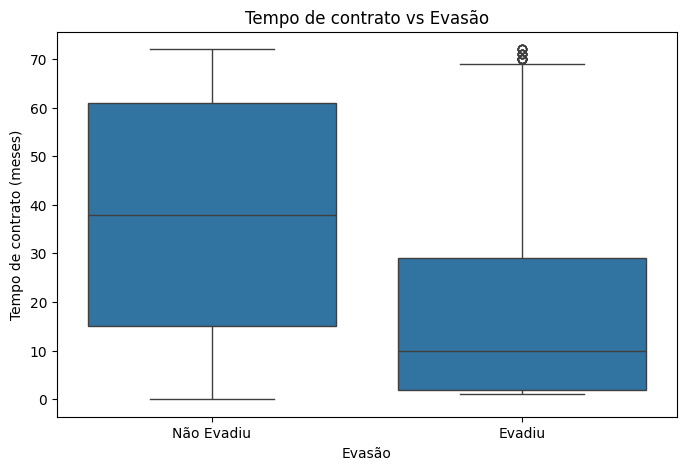

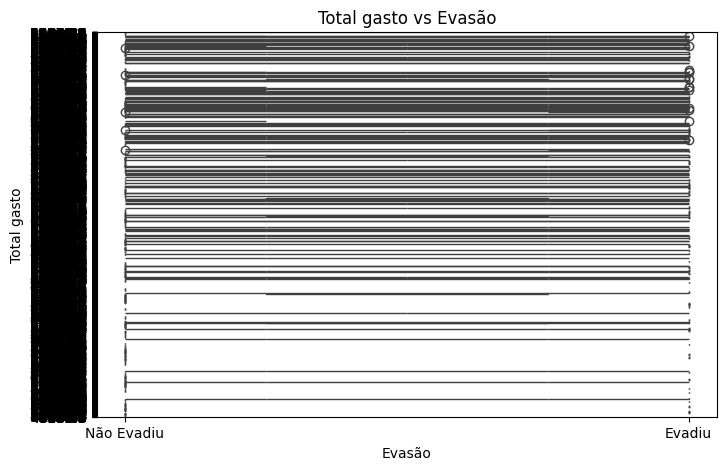

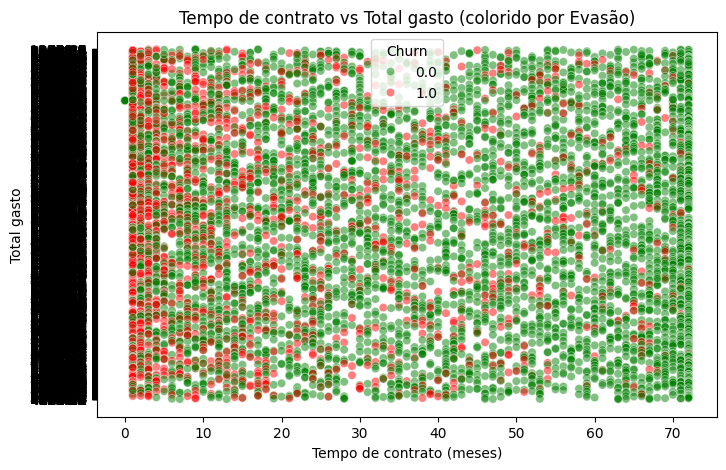

In [90]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados do arquivo que você indicou
df = pd.read_csv('dados_tratados (1).csv')

# Mapear Churn para valores numéricos (se ainda não estiver assim)
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Boxplot: Tempo de contrato (tenure) x Evasão
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='customer.tenure', data=df)
plt.xticks([0,1], ['Não Evadiu', 'Evadiu'])
plt.title('Tempo de contrato vs Evasão')
plt.ylabel('Tempo de contrato (meses)')
plt.xlabel('Evasão')
plt.show()

# Boxplot: Total gasto x Evasão
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='account.Charges.Total', data=df)
plt.xticks([0,1], ['Não Evadiu', 'Evadiu'])
plt.title('Total gasto vs Evasão')
plt.ylabel('Total gasto')
plt.xlabel('Evasão')
plt.show()

# Scatter plot: Tempo de contrato vs Total gasto colorido por evasão
plt.figure(figsize=(8,5))
sns.scatterplot(x='customer.tenure', y='account.Charges.Total', hue='Churn', data=df, palette=['green','red'], alpha=0.5)
plt.title('Tempo de contrato vs Total gasto (colorido por Evasão)')
plt.xlabel('Tempo de contrato (meses)')
plt.ylabel('Total gasto')
plt.show()





In [93]:
print(df['Churn'].isnull().sum())


224


In [94]:
df = df.dropna(subset=['Churn'])


In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Carregar os dados
df = pd.read_csv('dados_tratados (1).csv')

# Converter 'Churn' para numérico
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Remover linhas com NaN em 'Churn'
df = df.dropna(subset=['Churn'])

# Separar features e target
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

# Remover linhas com NaN em X
X = X.dropna()

# Ajustar y para manter somente as linhas correspondentes em X
y = y.loc[X.index]

# Agora dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

print(f'Tamanho do treino: {len(X_train)}')
print(f'Tamanho do teste: {len(X_test)}')



Tamanho do treino: 4930
Tamanho do teste: 2113


In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Carregar dados e preparar X, y
df = pd.read_csv('dados_tratados (1).csv')
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
df = df.dropna(subset=['Churn'])
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']
X = X.dropna()
y = y.loc[X.index]

# Identificar colunas numéricas e categóricas
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# Dividir dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Pipeline para Regressão Logística (exige normalização)
log_pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])),
    ('model', LogisticRegression(max_iter=1000))
])

# Pipeline para Random Forest (não exige normalização)
rf_pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])),
    ('model', RandomForestClassifier(random_state=42))
])

# Treinar os modelos
log_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

# Prever e avaliar Regressão Logística
y_pred_log = log_pipeline.predict(X_test)
print("Relatório da Regressão Logística:")
print(classification_report(y_test, y_pred_log))

# Prever e avaliar Random Forest
y_pred_rf = rf_pipeline.predict(X_test)
print("Relatório do Random Forest:")
print(classification_report(y_test, y_pred_rf))


Relatório da Regressão Logística:
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1552
         1.0       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

Relatório do Random Forest:
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      1552
         1.0       0.61      0.45      0.52       561

    accuracy                           0.78      2113
   macro avg       0.71      0.67      0.69      2113
weighted avg       0.76      0.78      0.77      2113



Modelo 1: Regressão Logística - A Regressão Logística é um modelo linear que usa distância e combinações lineares das features para fazer previsões.

Modelo 2: Random Forest - Random Forest é um modelo baseado em árvores de decisão, que fazem cortes binários nas variáveis, então não é sensível à escala dos dados.

=== Avaliação do Regressão Logística ===
Acurácia: 0.7984
Precisão: 0.6409
Recall: 0.5472
F1-score: 0.5904


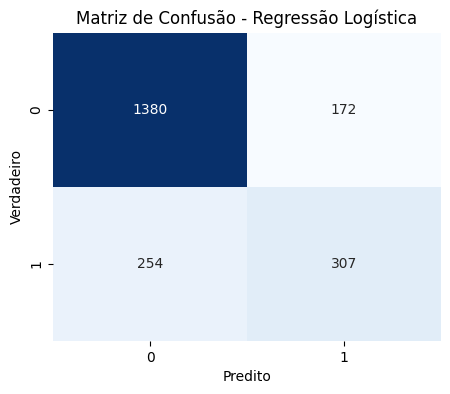

=== Avaliação do Random Forest ===
Acurácia: 0.7780
Precisão: 0.6117
Recall: 0.4492
F1-score: 0.5180


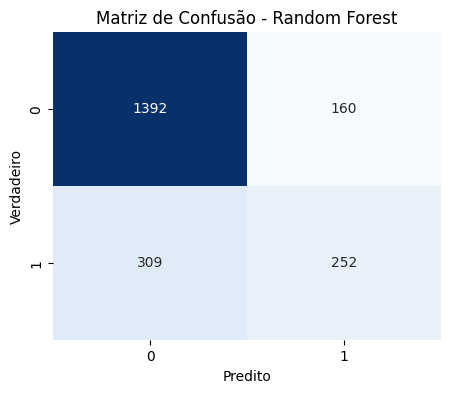

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def avaliar_modelo(nome, y_true, y_pred):
    print(f'=== Avaliação do {nome} ===')
    print(f'Acurácia: {accuracy_score(y_true, y_pred):.4f}')
    print(f'Precisão: {precision_score(y_true, y_pred):.4f}')
    print(f'Recall: {recall_score(y_true, y_pred):.4f}')
    print(f'F1-score: {f1_score(y_true, y_pred):.4f}')

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.title(f'Matriz de Confusão - {nome}')
    plt.show()

# Avaliar Regressão Logística
avaliar_modelo('Regressão Logística', y_test, y_pred_log)

# Avaliar Random Forest
avaliar_modelo('Random Forest', y_test, y_pred_rf)


                                Variável  Coeficiente
1198     cat__account.Charges.Total_20.2     1.363336
1204     cat__account.Charges.Total_20.5     1.257847
1197    cat__account.Charges.Total_20.15     1.216552
1196     cat__account.Charges.Total_20.1     1.167296
1826   cat__account.Charges.Total_288.05     1.096076
4103    cat__account.Charges.Total_740.3     1.027716
3047    cat__account.Charges.Total_50.45     1.010344
1211     cat__account.Charges.Total_20.9     0.967804
118   cat__account.Charges.Total_1052.35     0.964202
1925   cat__account.Charges.Total_3046.4     0.963458


/tmp/ipython-input-2454101209.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df.head(10), x='Coeficiente', y='Variável', palette='coolwarm')


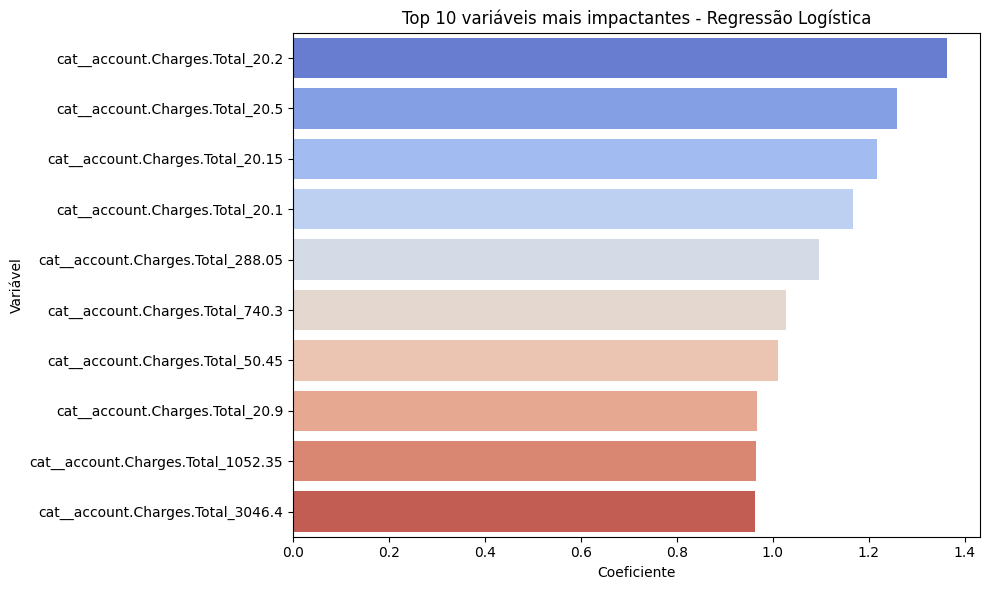

In [99]:
import numpy as np

# Acessar os nomes das variáveis depois do pré-processamento (OneHot + Scaling)
feature_names = log_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Coeficientes do modelo
coef = log_pipeline.named_steps['model'].coef_[0]

# Organizar em um DataFrame para visualização
coef_df = pd.DataFrame({
    'Variável': feature_names,
    'Coeficiente': coef
}).sort_values(by='Coeficiente', key=abs, ascending=False)

# Mostrar top 10
print(coef_df.head(10))

# Visualizar
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=coef_df.head(10), x='Coeficiente', y='Variável', palette='coolwarm')
plt.title('Top 10 variáveis mais impactantes - Regressão Logística')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()


                                       Variável  Importância
1                          num__customer.tenure     0.109510
2                  num__account.Charges.Monthly     0.086304
35         cat__account.Contract_Month-to-month     0.033904
42  cat__account.PaymentMethod_Electronic check     0.024120
17              cat__internet.OnlineSecurity_No     0.020890
26                 cat__internet.TechSupport_No     0.017379
37               cat__account.Contract_Two year     0.017036
15    cat__internet.InternetService_Fiber optic     0.016026
20                cat__internet.OnlineBackup_No     0.015879
28                cat__internet.TechSupport_Yes     0.015532


/tmp/ipython-input-1790267855.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=import_df.head(10), x='Importância', y='Variável', palette='viridis')


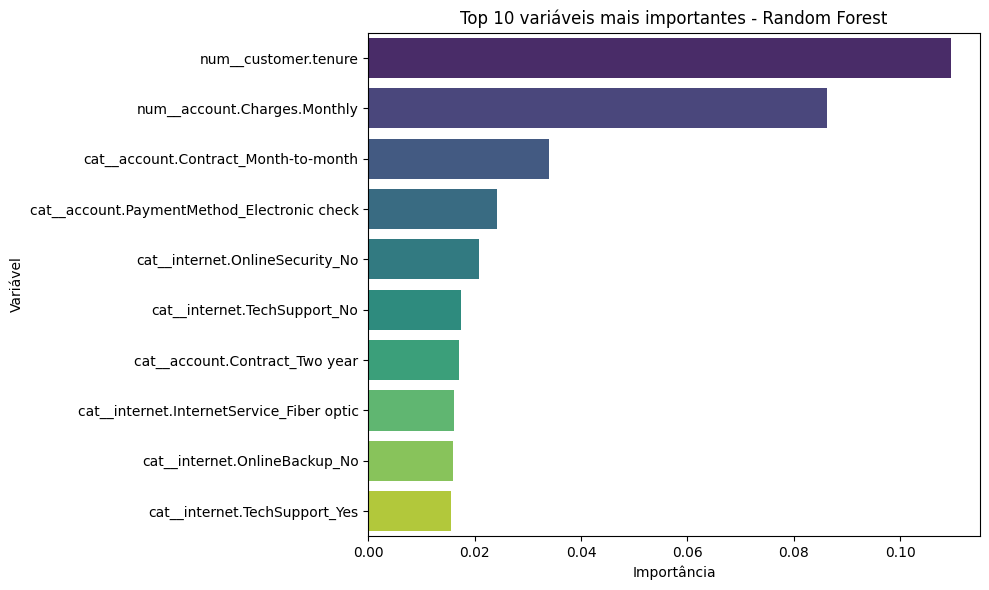

In [100]:
# Importância das variáveis
importances = rf_pipeline.named_steps['model'].feature_importances_

# Obter os nomes das variáveis processadas (OneHotEncoder já foi aplicado)
rf_feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Organizar
import_df = pd.DataFrame({
    'Variável': rf_feature_names,
    'Importância': importances
}).sort_values(by='Importância', ascending=False)

# Mostrar top 10
print(import_df.head(10))

# Visualizar
plt.figure(figsize=(10,6))
sns.barplot(data=import_df.head(10), x='Importância', y='Variável', palette='viridis')
plt.title('Top 10 variáveis mais importantes - Random Forest')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()


Relatório de Evasão de Clientes (Churn)

 Objetivo

O objetivo foi analisar quais fatores mais influenciam a saída de clientes (churn) e treinar modelos para prever quem tem chance de sair, ajudando a empresa a evitar perdas.

 Dados Usados

Usamos uma base de dados com informações dos clientes, como:

Tempo de contrato

Tipo de plano

Gasto mensal e total

Forma de pagamento

Se usava suporte técnico, internet, telefone, etc.

A coluna Churn indica se o cliente saiu (Yes) ou ficou (No).

 Modelos Usados
 1. Regressão Logística

Modelo simples que mostra o impacto de cada variável.

Precisa normalizar os dados.

 2. Random Forest

Modelo mais forte, com várias árvores de decisão.

Funciona bem mesmo sem normalizar os dados.

 Resultados
 Avaliação dos modelos (teste):
Modelo	Resultado geral
Regressão Logística	Boa performance, mas menos precisa.
Random Forest	Melhor performance e mais equilibrado.
 Fatores mais importantes para a evasão

Os modelos mostraram que os clientes saem mais quando:

Estão em contrato mensal

Usam “Electronic Check” como pagamento

São clientes novos (pouco tempo de casa)

Pagam muito por mês

Não usam suporte técnico

 O que a empresa pode fazer

Com base nos resultados, a empresa pode:

Incentivar contratos mais longos (com bônus ou descontos)

Oferecer melhores formas de pagamento

Dar atenção especial aos clientes novos

Revisar planos muito caros

Promover o uso do suporte técnico

 Conclusão

O modelo Random Forest foi o melhor para prever a evasão.
Com base nos dados, é possível criar ações simples e eficazes para manter mais clientes e reduzir perdas.